# Install dependencies and import libraries

In [4]:
!pip install -Uq fastbook fastai duckduckgo_search

I quite like how you can see which libraries are currently installed. Here is a list of all libraries currently available that begin with 'f'.

In [5]:
#!pip list | grep "^fast"

In [6]:
! conda list | grep "^ipy"

ipykernel                 6.25.0          py311h746a85d_0  
ipython                   8.20.0          py311haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
ipywidgets                7.8.1                    pypi_0    pypi


In [7]:
from fastbook import *
from duckduckgo_search import DDGS, AsyncDDGS
from fastcore.all import *
from itertools import islice
from IPython.display import HTML
from shutil import move
from fastai.vision.widgets import *
from ipywidgets import interact
from fastai.basics import *

In [8]:
 plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

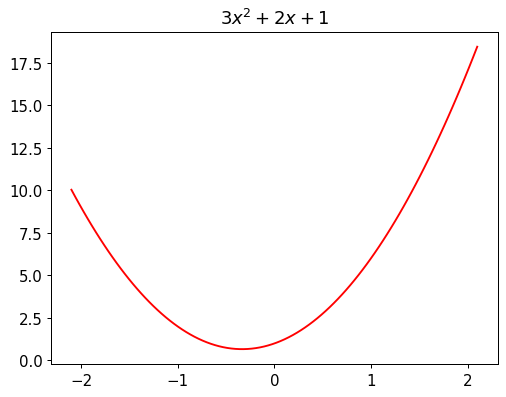

In [9]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [10]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [11]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

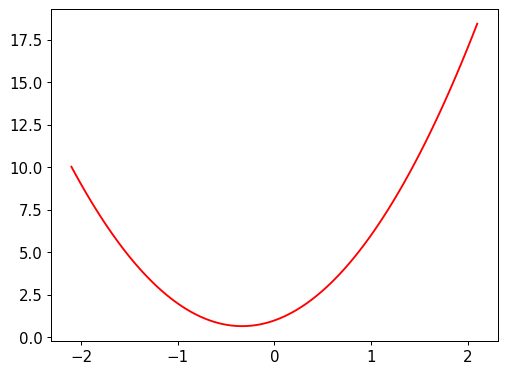

In [12]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [13]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [14]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

In [15]:
x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

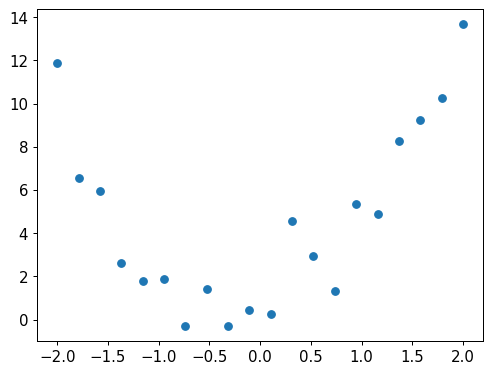

In [16]:
plt.scatter(x,y);

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

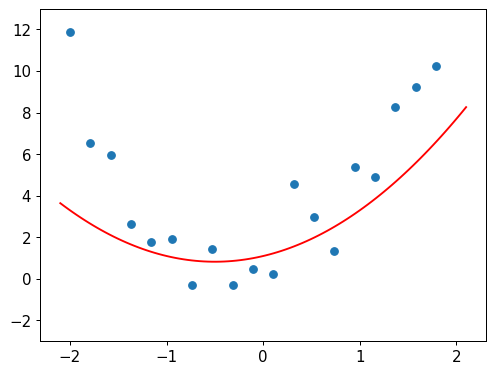

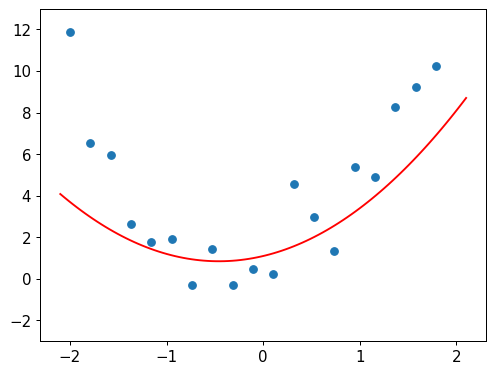

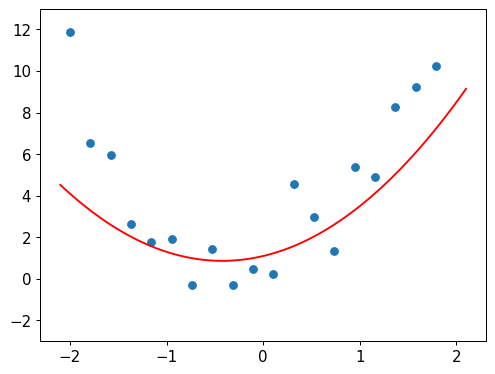

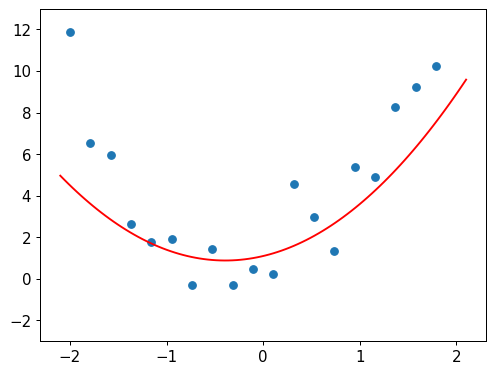

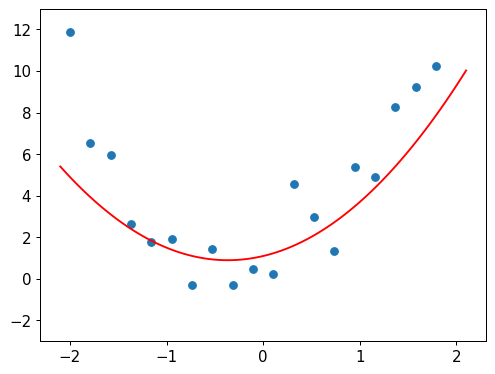

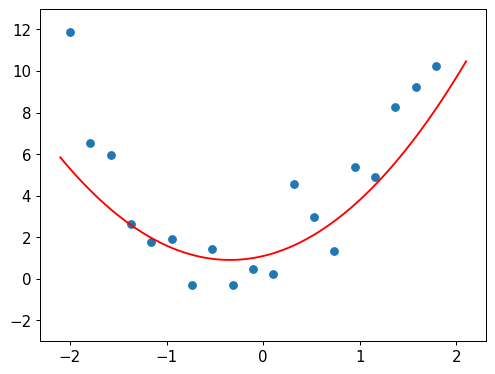

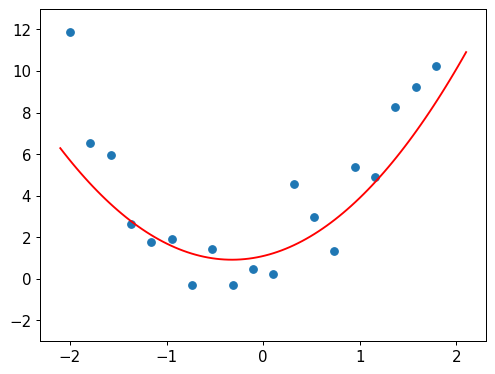

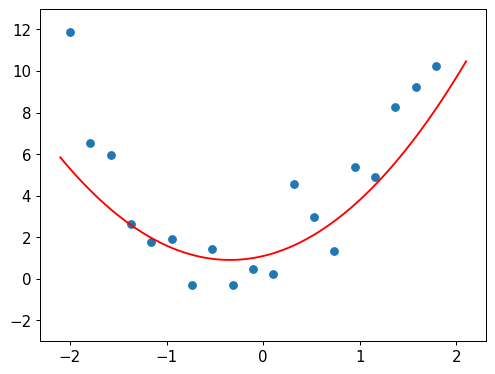

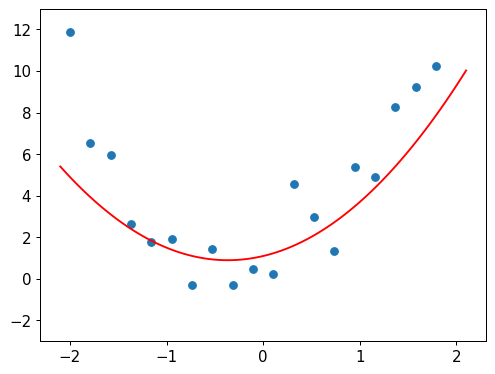

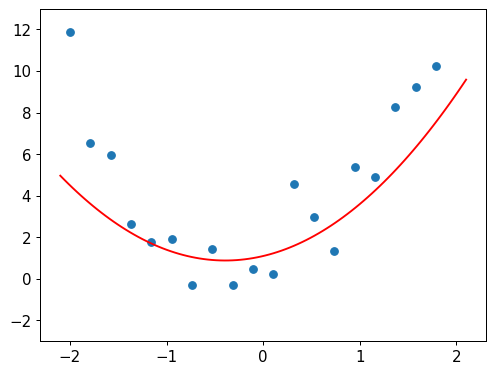

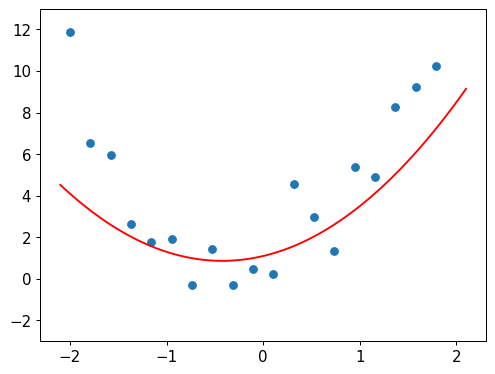

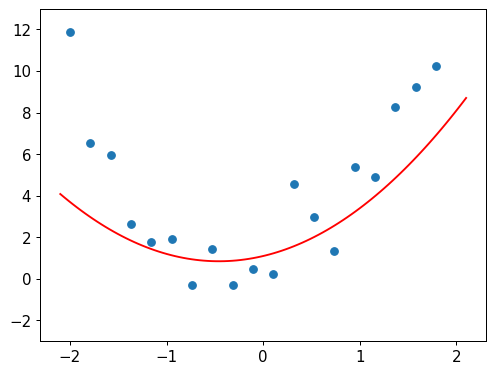

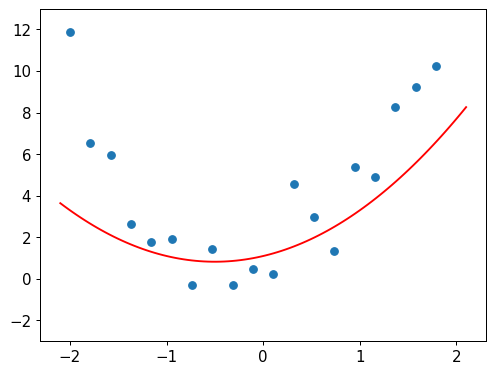

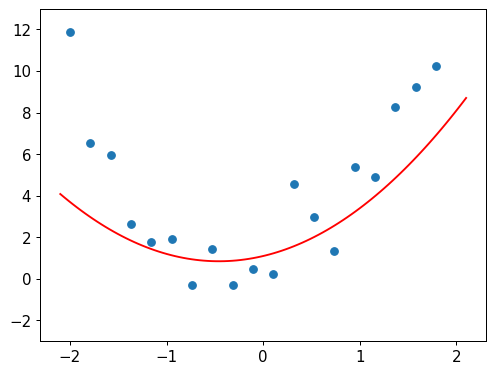

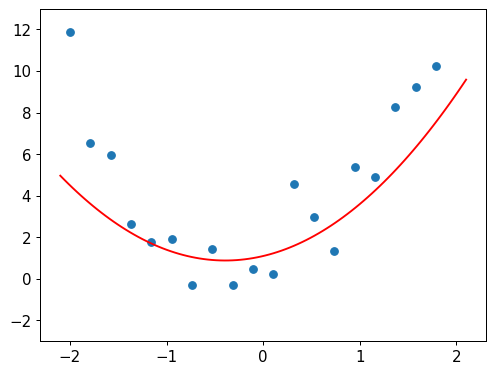

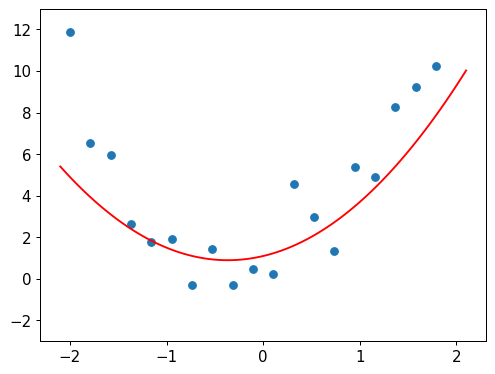

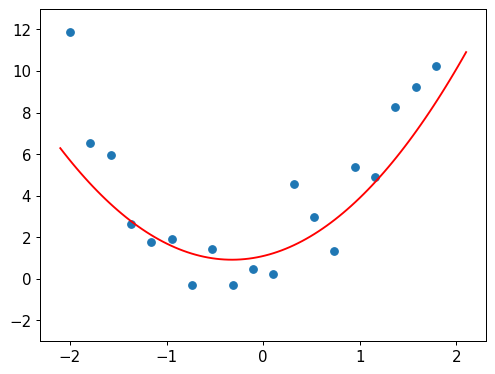

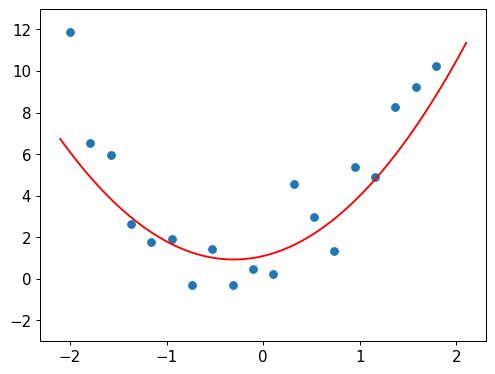

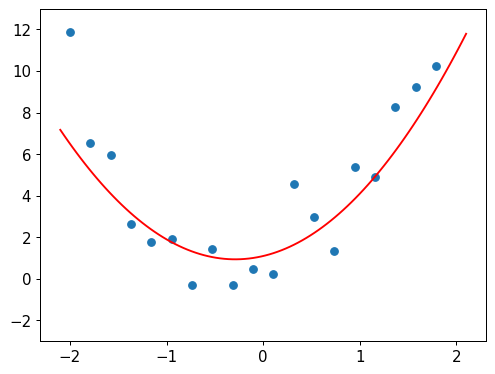

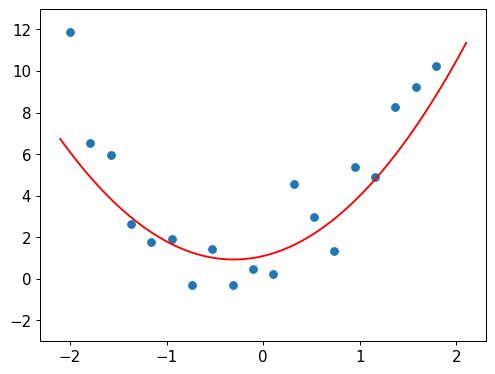

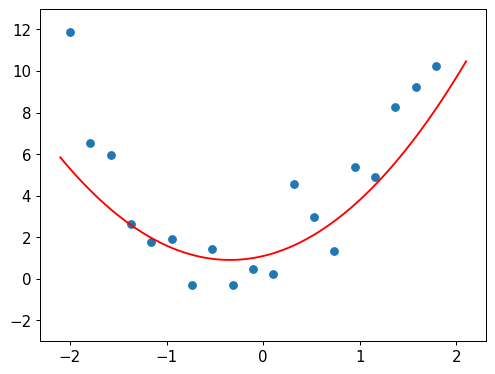

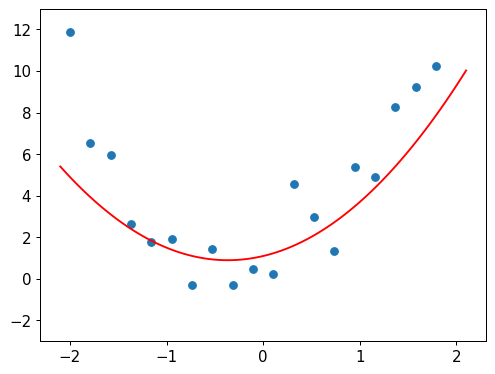

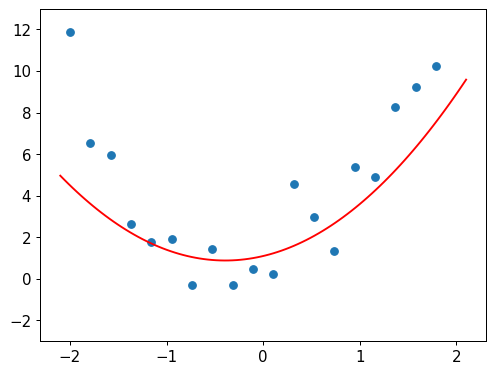

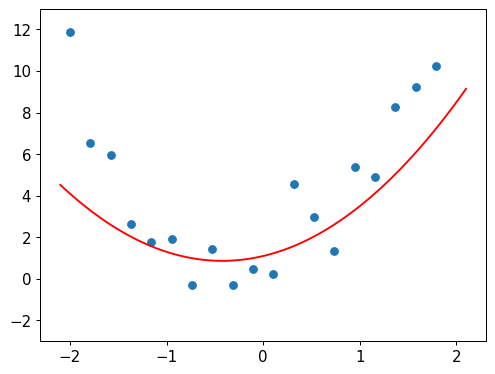

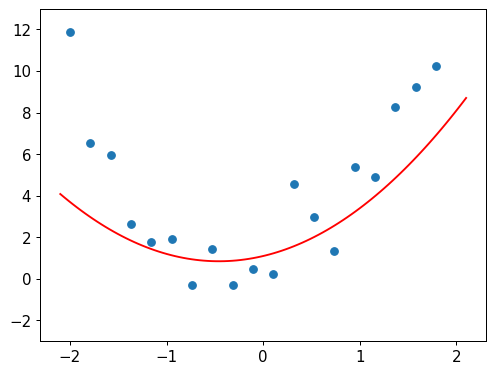

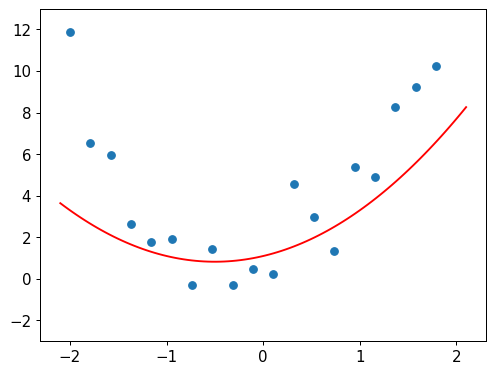

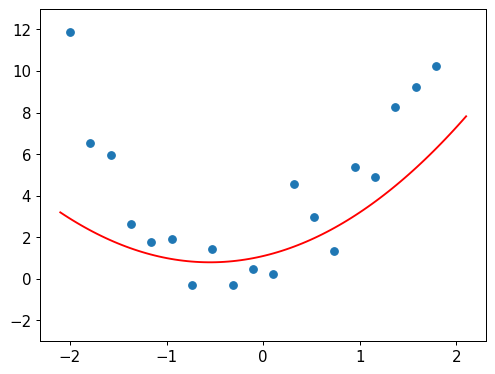

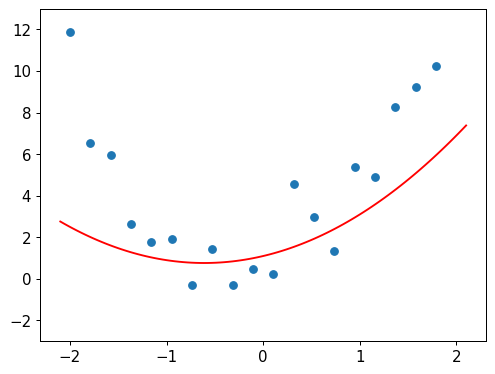

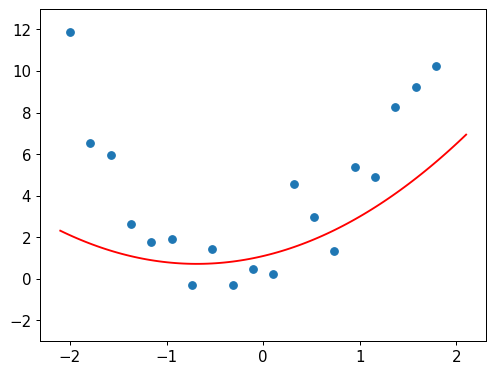

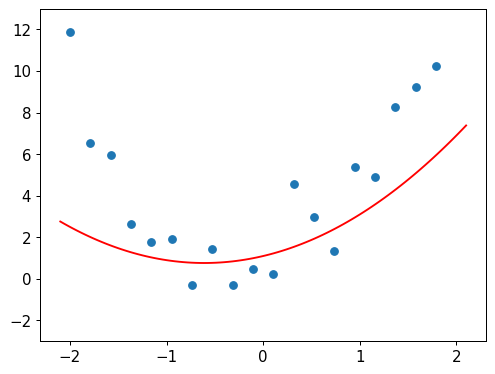

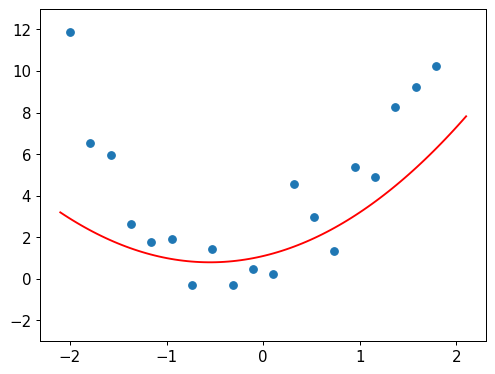

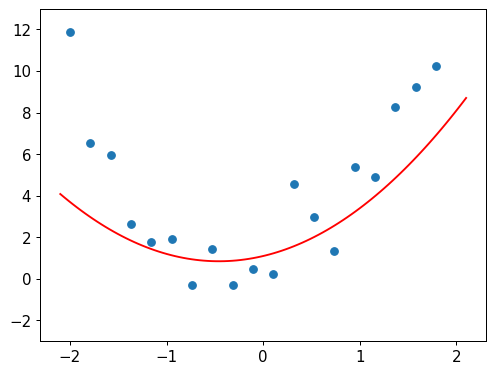

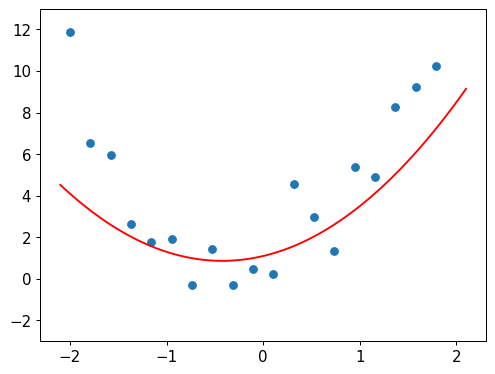

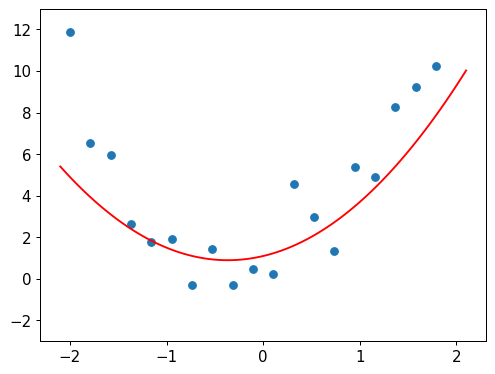

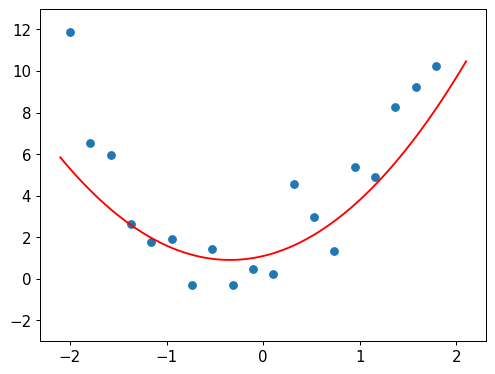

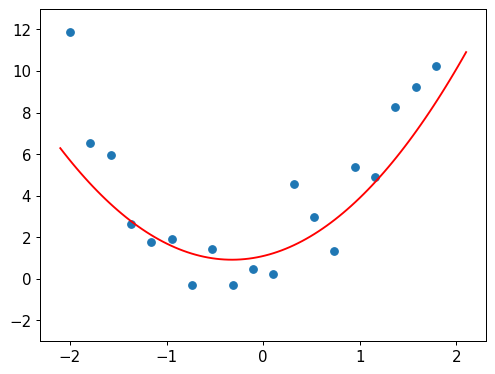

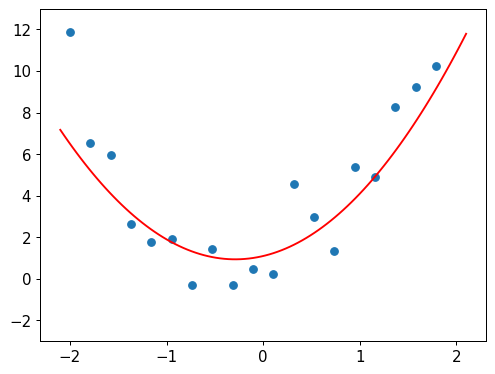

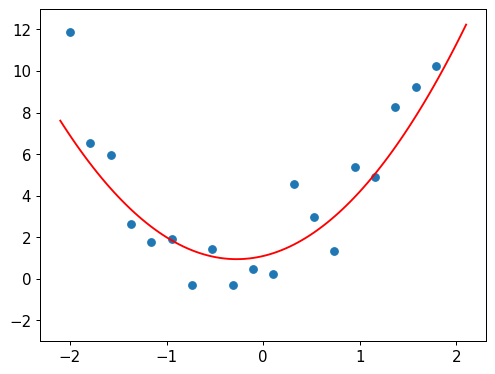

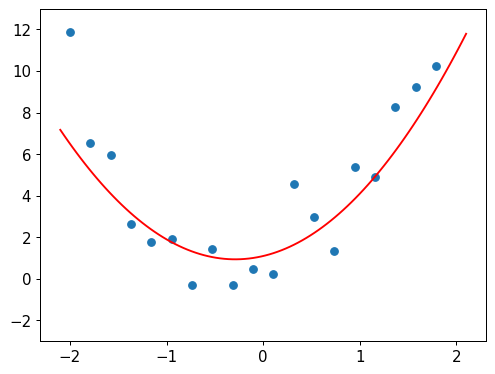

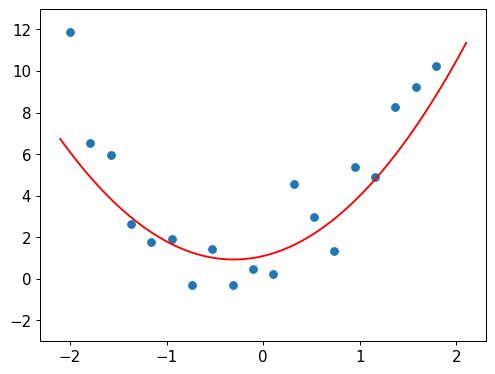

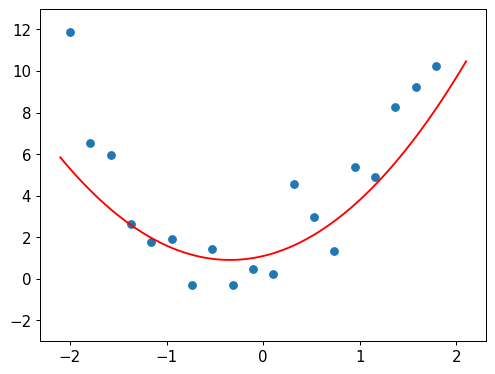

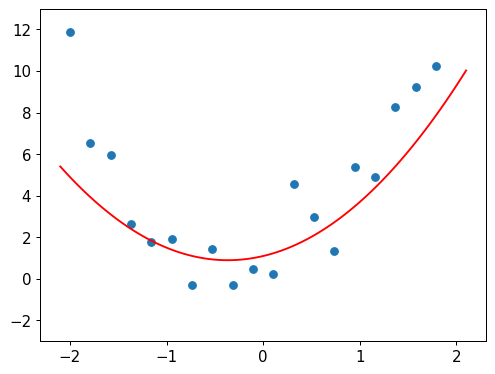

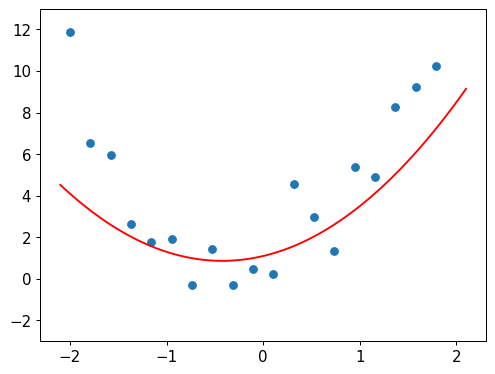

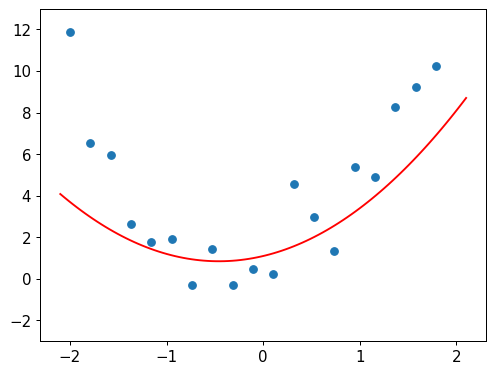

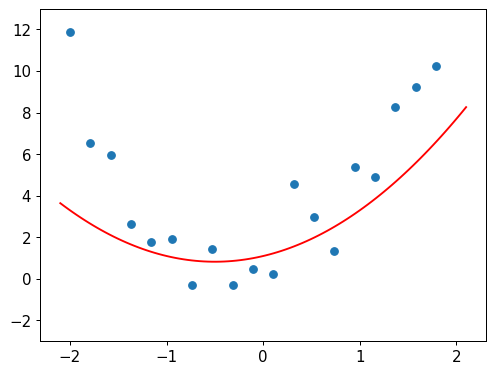

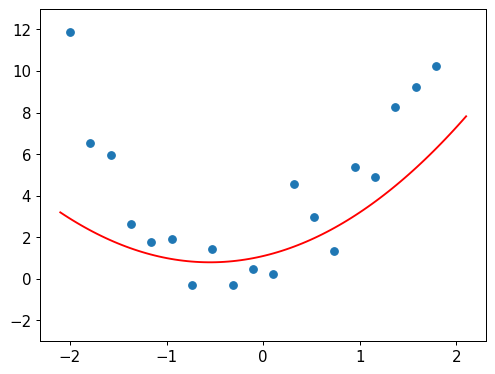

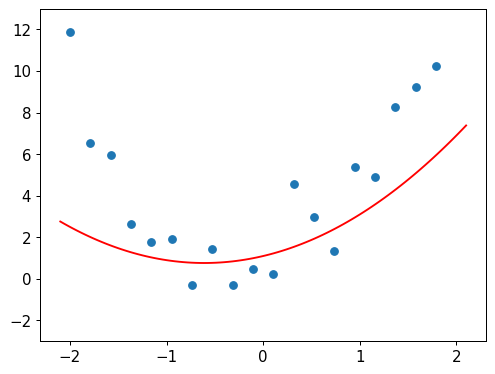

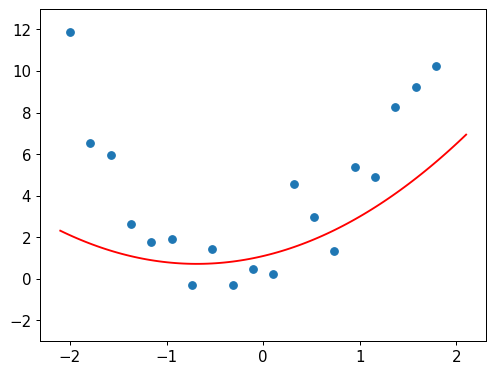

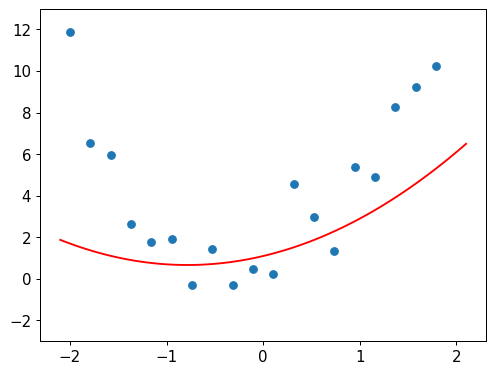

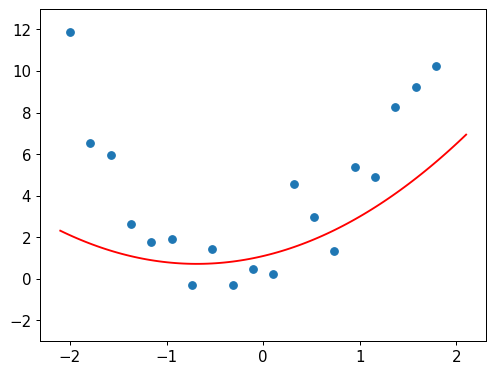

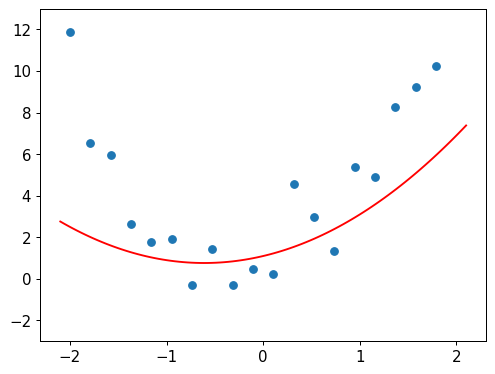

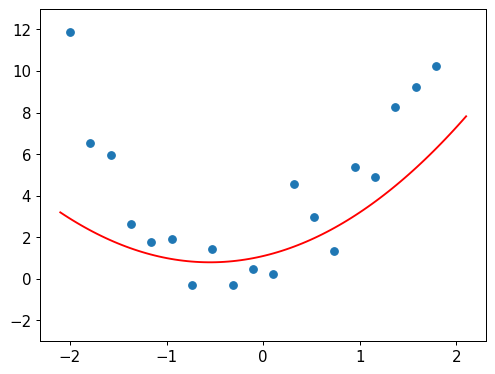

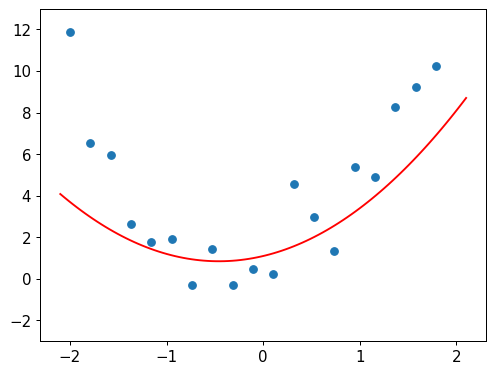

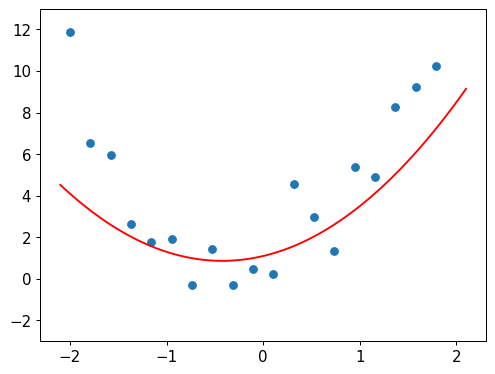

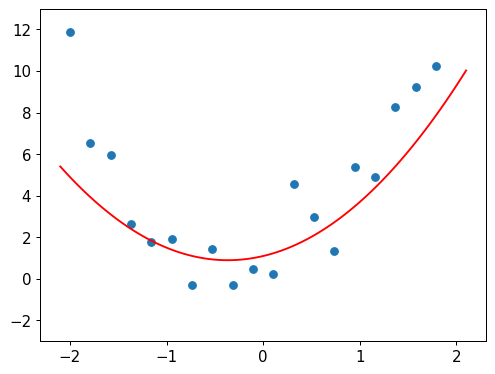

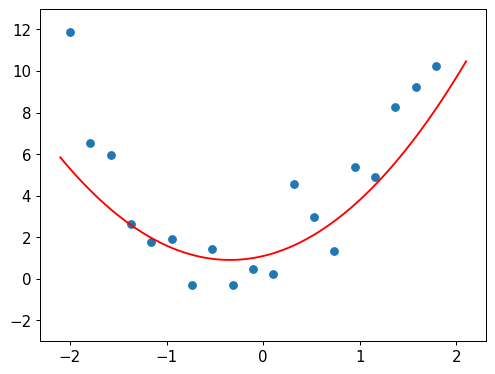

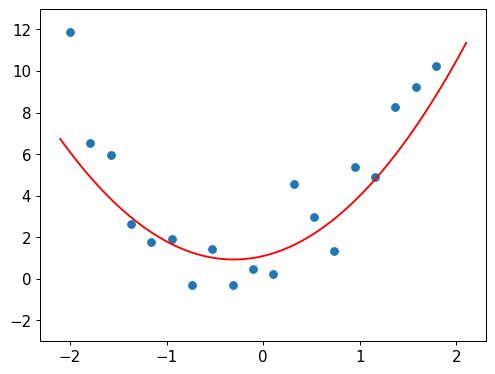

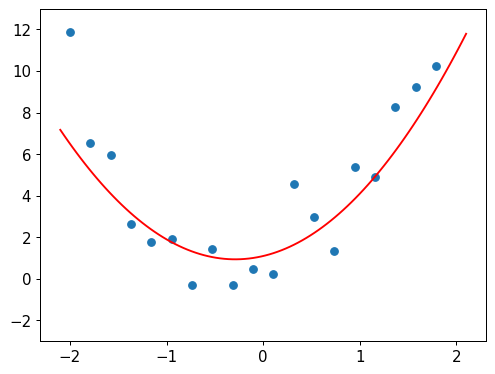

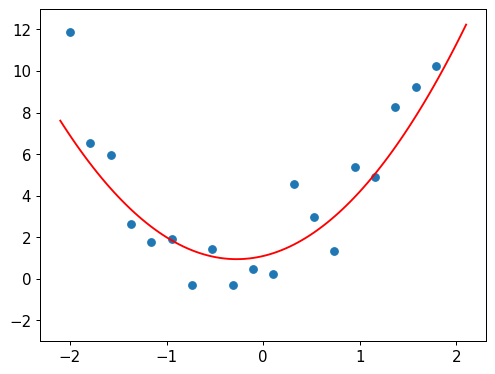

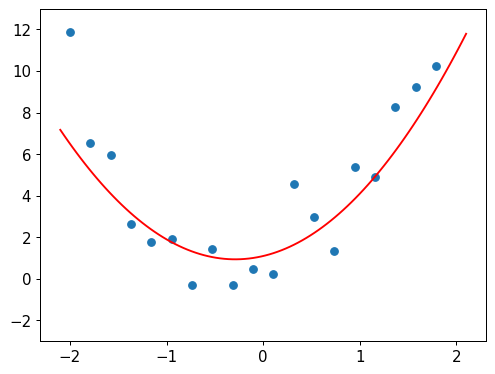

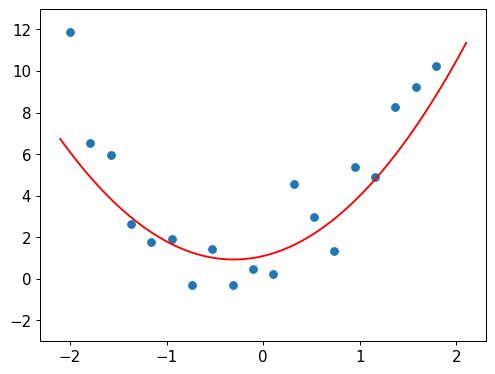

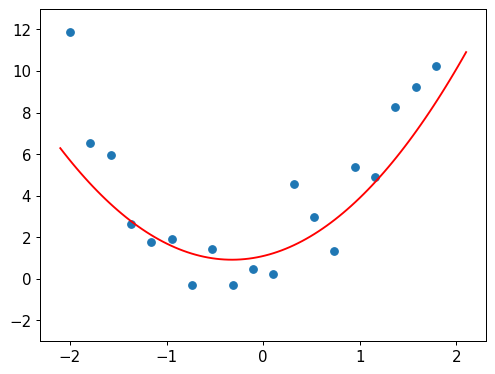

In [17]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))